# Task
Create a Python script that uses a pre-trained YOLOv5 model ("https://github.com/jacsonmatte/modelosAbensoft/blob/main/bestYolov5_1.pt") to perform object detection on an image uploaded by the user. The script should display the uploaded image with the detection results annotated.

## Instalar as dependências

### Subtask:
Instalar o PyTorch e o repositório YOLOv5.


In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124
!pip install ultralytics
import torch

print(torch.cuda.is_available())
print(torch.version.cuda)

In [2]:
# Load the custom YOLOv5 model
model_path = 'https://github.com/jacsonmatte/modelosAbensoft/raw/main/bestYolov5_1.pt'
from ultralytics import YOLO

model = YOLO(model_path)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.01M/5.01M [00:00<00:00, 118MB/s]


Saving 1752004530132_cnh_digital-664971262_pdf_page_1_png.rf.ae2ecf98c07dbfe9b1c9f95b3349e77a_0_rg.jpg to 1752004530132_cnh_digital-664971262_pdf_page_1_png.rf.ae2ecf98c07dbfe9b1c9f95b3349e77a_0_rg.jpg
User uploaded file "1752004530132_cnh_digital-664971262_pdf_page_1_png.rf.ae2ecf98c07dbfe9b1c9f95b3349e77a_0_rg.jpg" with length 106429 bytes


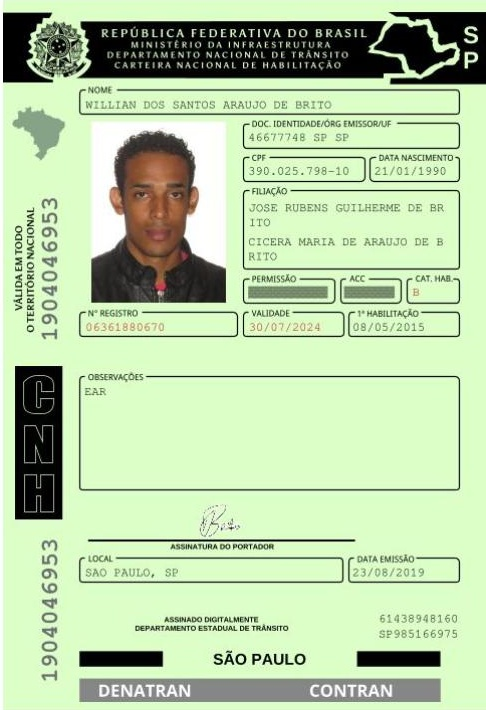

In [107]:
from google.colab import files
from IPython.display import Image, display
import os

uploaded = files.upload()

for fn in uploaded.keys():
  # Print the file name
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

  # Display the uploaded image
  display(Image(fn))
  image_path = fn

In [108]:
# Perform detection
results = model.predict(image_path)


image 1/1 /content/1752004530132_cnh_digital-664971262_pdf_page_1_png.rf.ae2ecf98c07dbfe9b1c9f95b3349e77a_0_rg.jpg: 640x448 1 cnh, 11.6ms
Speed: 2.8ms preprocess, 11.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 448)


No detection output directory found. Attempting to display results directly from the results object.


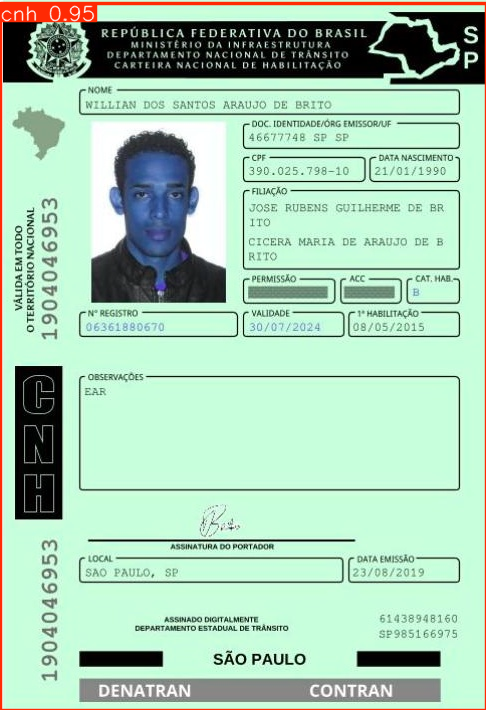

In [109]:
# Display the annotated image
from IPython.display import Image, display
import glob
import os
import numpy as np
from PIL import Image as PILImage # Import Image from PIL and alias it


# If no output directory is found, try to display the annotated image directly from the results object
print("No detection output directory found. Attempting to display results directly from the results object.")
# The results object is a list of Results objects (one per image).
# The annotated image is usually available via the .plot() method which returns a numpy array.
if results and hasattr(results[0], 'plot'):
    annotated_img_array = results[0].plot()
    # Convert the numpy array to an image and display it using PIL's Image
    display(PILImage.fromarray(annotated_img_array))
else:
    print("Could not find annotated image data in results object.")

# Task
Após detectar a CNH ou RG em uma imagem, caso seja uma CNH, recortar a região da CNH e usar o modelo YOLOv5 "https://github.com/jacsonmatte/modelosAbensoft/blob/main/best_CNH_data_YoloV5.pt" para detectar os campos da CNH e exibir os resultados.

## Processamento dos resultados da detecção inicial

### Subtask:
Extrair as caixas delimitadoras (bounding boxes) da CNH detectada a partir dos resultados do primeiro modelo.


**Reasoning**:
Extract the bounding box coordinates for the detected CNH from the results of the first model.



In [110]:
cnh_bbox = None

if results:
  # Assuming only one image was processed, access the first Results object
  result = results[0]

  # Access the detected bounding boxes
  boxes = result.boxes

  # Iterate through the boxes and find the one corresponding to 'cnh'
  # The class index for 'cnh' can be found in model.names
  # Assuming 'cnh' is the first class, its index would be 0.
  # You might need to verify the actual index based on your model.names
  cnh_class_index = 0 # Replace with the actual index if different

  for box in boxes:
    if int(box.cls) == cnh_class_index:
      # Extract the coordinates (xmin, ymin, xmax, ymax)
      cnh_bbox = box.xyxy[0].tolist()
      break # Assuming only one CNH is expected per image

if cnh_bbox:
  print(f"CNH Bounding Box: {cnh_bbox}")
else:
  print("No CNH detected in the image.")


CNH Bounding Box: [0.27155447006225586, 3.5514354705810547, 486.0, 710.0]


## Carregar o modelo para detecção de campos da CNH

### Subtask:
Carregar o modelo YOLOv5 "best_CNH_data_YoloV5.pt" para detectar os campos específicos da CNH.

In [111]:
# Load the second YOLOv5 model for CNH field detection
cnh_fields_model_path = 'https://github.com/jacsonmatte/modelosAbensoft/raw/main/best_CNH_data_YoloV5.pt'
cnh_fields_model = YOLO(cnh_fields_model_path)

Found https://github.com/jacsonmatte/modelosAbensoft/raw/main/best_CNH_data_YoloV5.pt locally at weights/best_CNH_data_YoloV5.pt


## Recorte da região de interesse (CNH)

### Subtask:
Usar as coordenadas da caixa delimitadora da CNH para recortar essa região da imagem original.

In [112]:
# Check if cnh_bbox was successfully extracted
if cnh_bbox:
    # Load the original image using PIL
    original_image = PILImage.open(image_path)

    # Crop the image using the bounding box coordinates
    # PIL's crop method takes a box tuple (left, upper, right, lower)
    cropped_cnh_image = original_image.crop(cnh_bbox)

    print("CNH region cropped successfully.")
else:
    print("Cannot crop CNH. Bounding box not available.")

CNH region cropped successfully.


Orientação predominante: Horizontal. Ângulo detectado: 0.00 graus.

--- Resultados ---
Ângulo de rotação aplicado: 0.00 graus
Orientação detectada da CNH: horizontal


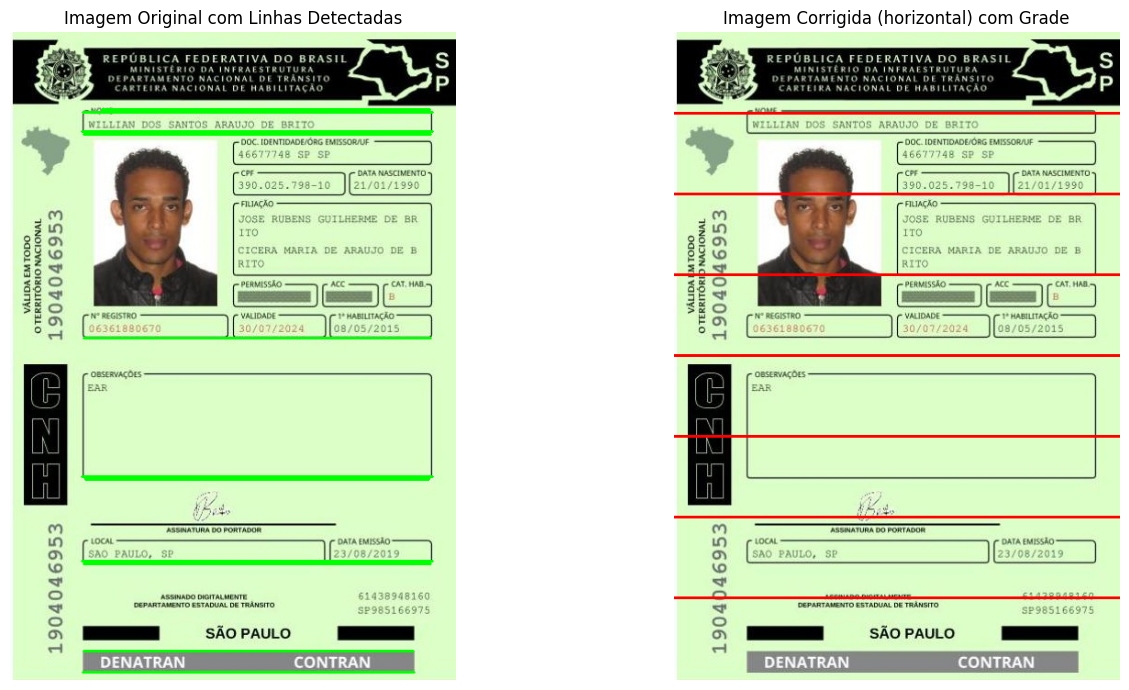

In [113]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# from google.colab.patches import cv2_imshow # Descomente se estiver no Google Colab
from PIL import Image

# --- Funções Auxiliares (mantidas as mesmas) ---

def detectar_e_corrigir_rotacao_cnh_v2(image_np_array, top_percent_lines=5):
    """
    Detecta a inclinação de uma CNH em uma imagem (horizontal ou vertical)
    e a corrige, considerando apenas as maiores linhas.

    Args:
        image_np_array (numpy.ndarray): O array NumPy da imagem da CNH.
        top_percent_lines (int): Percentual das maiores linhas a serem consideradas
                                 para o cálculo do ângulo (ex: 5 para 5%).

    Returns:
        tuple: Uma tupla contendo:
               - float: O ângulo de rotação detectado (em graus).
               - numpy.ndarray: A imagem corrigida (rotacionada para ser horizontal ou vertical).
               - numpy.ndarray: A imagem original com as linhas detectadas desenhadas.
               - str: A orientação da CNH detectada ('horizontal' ou 'vertical').
    """
    img = image_np_array.copy()
    if img is None:
        print("Erro: O array da imagem está vazio.")
        return None, None, None, None

    img_original = img.copy()

    # 2. Pré-processamento
    # É crucial que a imagem seja convertida para tons de cinza corretamente.
    # Se 'img' (vindo de PIL.Image.Image -> np.array) está em RGB, use COLOR_RGB2GRAY.
    # Se, por algum motivo, já estiver em BGR (menos comum para PIL), use COLOR_BGR2GRAY.
    # Vamos assumir que PIL fornece RGB.
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # Corrigido para assumir RGB da PIL

    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 120, 150, apertureSize=3)

    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 50, minLineLength=50, maxLineGap=10)

    if lines is None:
        print("Nenhuma linha detectada. Não foi possível estimar a rotação.")
        # Retorna a imagem original (não rotacionada) e sem linhas desenhadas
        return 0, img, img.copy(), 'desconhecida'

    line_data = []
    for line in lines:
        x1, y1, x2, y2 = line[0]
        length = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        angle_rad = np.arctan2(y2 - y1, x2 - x1)
        angle_deg = np.degrees(angle_rad)
        line_data.append((length, angle_deg, line[0]))

    line_data.sort(key=lambda x: x[0], reverse=True)

    num_lines_to_consider = max(1, int(len(line_data) * (top_percent_lines / 100.0)))
    dominant_lines = line_data[:num_lines_to_consider]

    for length, angle_deg, line_segment in dominant_lines:
        x1, y1, x2, y2 = line_segment
        # Assegura que img_original é em BGR para desenhar com cv2.line
        # Se a entrada for RGB, talvez seja necessário converter img_original para BGR antes de desenhar
        # ou ajustar a cor para (B, G, R) se a imagem permanecer RGB.
        # Vamos assumir que img_original é RGB para exibição posterior com matplotlib
        # e a cor (0, 255, 0) em RGB é verde.
        if img_original.shape[2] == 3: # Se for colorida
            cv2.line(img_original, (x1, y1), (x2, y2), (0, 255, 0), 2) # Assume que img_original está em RGB para plotagem

    horizontal_angles = []
    vertical_angles = []

    for length, angle_deg, _ in dominant_lines:
        normalized_angle = angle_deg
        if normalized_angle > 90:
            normalized_angle -= 180
        elif normalized_angle < -90:
            normalized_angle += 180

        if abs(normalized_angle) < 15:
            horizontal_angles.append(normalized_angle)
        elif abs(abs(normalized_angle) - 90) < 15:
            vertical_angles.append(normalized_angle)

    detected_orientation = 'desconhecida'
    angle_to_rotate = 0

    if len(horizontal_angles) > len(vertical_angles) and len(horizontal_angles) > 0:
        angle_to_rotate = np.median(horizontal_angles)
        detected_orientation = 'horizontal'
        print(f"Orientação predominante: Horizontal. Ângulo detectado: {angle_to_rotate:.2f} graus.")
    elif len(vertical_angles) > 0:
        median_vertical_angle = np.median(vertical_angles)

        if abs(median_vertical_angle - 90) < abs(median_vertical_angle + 90):
            angle_to_rotate = -(median_vertical_angle - 90)
            detected_orientation = 'vertical'
        else:
            angle_to_rotate = -(median_vertical_angle + 90)
            detected_orientation = 'vertical'

        print(f"Orientação predominante: Vertical. Ângulo detectado para alinhar verticalmente: {median_vertical_angle:.2f} graus. Ajuste: {angle_to_rotate:.2f} graus.")

    else:
        print("Não foi possível determinar uma orientação predominante ou linhas suficientes.")
        return 0, img, img_original, 'desconhecida'

    (h, w) = img.shape[:2]
    center = (w // 2, h // 2)

    M = cv2.getRotationMatrix2D(center, angle_to_rotate, 1.0)
    # A rotação deve ser aplicada à imagem original em RGB para manter as cores
    rotated = cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

    return angle_to_rotate, rotated, img_original, detected_orientation

def desenhar_linhas_grade(image, orientation, num_lines=7, color=(0, 0, 255), thickness=2):
    """
    Desenha linhas de grade horizontais ou verticais em uma imagem,
    baseado na orientação detectada.

    Args:
        image (numpy.ndarray): A imagem para desenhar as linhas.
        orientation (str): A orientação da CNH ('horizontal' ou 'vertical').
        num_lines (int): O número de linhas a desenhar.
        color (tuple): A cor das linhas (BGR).
        thickness (int): A espessura das linhas.

    Returns:
        numpy.ndarray: A imagem com as linhas de grade desenhadas.
    """
    img_with_grid = image.copy()
    h, w = img_with_grid.shape[:2]

    # Assegura que a cor seja compatível com o formato da imagem (BGR para OpenCV)
    # Se a imagem for RGB, pode ser necessário ajustar a ordem da cor para (R, G, B) aqui
    # ou converter img_with_grid para BGR antes de desenhar.
    # Por padrão, vamos assumir que as imagens que chegam aqui (corrected_image) serão tratadas como BGR por cv2.line
    # e depois convertidas para RGB para matplotlib.

    if orientation == 'horizontal':
        spacing = h // (num_lines + 1)
        for i in range(1, num_lines + 1):
            y_pos = i * spacing
            cv2.line(img_with_grid, (0, y_pos), (w, y_pos), color, thickness)
    elif orientation == 'vertical':
        spacing = w // (num_lines + 1)
        for i in range(1, num_lines + 1):
            x_pos = i * spacing
            cv2.line(img_with_grid, (x_pos, 0), (x_pos, h), color, thickness)
    else:
        spacing = h // (num_lines + 1)
        for i in range(1, num_lines + 1):
            y_pos = i * spacing
            cv2.line(img_with_grid, (0, y_pos), (w, y_pos), color, thickness)
        print("Orientação desconhecida, linhas horizontais padrão desenhadas.")

    return img_with_grid




# Converter a imagem PIL para um array NumPy
# Lembre-se que PIL geralmente usa RGB, enquanto OpenCV usa BGR para muitas operações.
# original_image_for_display manterá o formato RGB para exibição com Matplotlib.
original_image_for_display = np.array(cropped_cnh_image)

# A função 'detectar_e_corrigir_rotacao_cnh_v2' espera BGR para o processamento de Canny, etc.
# Portanto, convertemos original_image_for_display (que é RGB) para BGR antes de passar.
image_for_processing = cv2.cvtColor(original_image_for_display, cv2.COLOR_RGB2BGR)


# Chame a função principal com o array NumPy da imagem
detected_angle, corrected_image, original_with_lines, orientation = detectar_e_corrigir_rotacao_cnh_v2(image_for_processing, top_percent_lines=5)

if detected_angle is not None and corrected_image is not None and original_image_for_display is not None:
    print("\n--- Resultados ---")
    print(f"Ângulo de rotação aplicado: {detected_angle:.2f} graus")
    print(f"Orientação detectada da CNH: {orientation}")

    # Desenhar linhas de grade na imagem corrigida com base na orientação detectada
    # A função desenhar_linhas_grade também deve esperar BGR se estiver usando cv2.line
    # e se a cor estiver definida como (B,G,R).
    # Se 'corrected_image' é BGR, a cor (0,0,255) é vermelho.
    corrected_image_with_grid = desenhar_linhas_grade(corrected_image, orientation, num_lines=7, color=(0, 0, 255), thickness=2)

    # Converter imagens para RGB para exibir com matplotlib (que espera RGB)
    # original_with_lines é BGR (cv2.line desenha em BGR), precisa ser convertido para RGB para matplotlib
    original_with_lines_rgb = cv2.cvtColor(original_with_lines, cv2.COLOR_BGR2RGB)

    # corrected_image_with_grid é BGR, precisa ser convertido para RGB para matplotlib
    corrected_image_rgb = cv2.cvtColor(corrected_image_with_grid, cv2.COLOR_BGR2RGB)

    # Plotar as duas imagens lado a lado
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))

    axes[0].imshow(original_with_lines_rgb)
    axes[0].set_title('Imagem Original com Linhas Detectadas')
    axes[0].axis('off')

    axes[1].imshow(corrected_image_rgb)
    axes[1].set_title(f'Imagem Corrigida ({orientation}) com Grade')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

    # Opcional: Salvar a imagem corrigida com as linhas
    # cv2.imwrite(f'cnh_corrigida_{orientation}.jpg', corrected_image_with_grid)
    # print(f"\nImagem corrigida com grade salva como 'cnh_corrigida_{orientation}.jpg'")

## Detecção de campos na CNH recortada

### Subtask:
Executar o segundo modelo YOLOv5 na imagem recortada da CNH para identificar os campos.

In [114]:
# Perform detection on the cropped CNH image
corrected_image = cv2.resize(corrected_image, (1024, 1024), interpolation=cv2.INTER_CUBIC)

if 'corrected_image' in locals():
    cnh_fields_results = cnh_fields_model.predict(corrected_image)
else:
    print("Cropped CNH image not available for field detection.")


0: 640x640 1 cpf, 1 data_emissao, 1 data_first_hab, 1 data_nasci, 1 data_validade, 1 filiacao, 1 nome, 1 reg_cnh, 1 reg_geral, 7.6ms
Speed: 3.7ms preprocess, 7.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


## Exibir os resultados da detecção de campos

### Subtask:
Visualizar a imagem recortada da CNH com os campos detectados anotados.

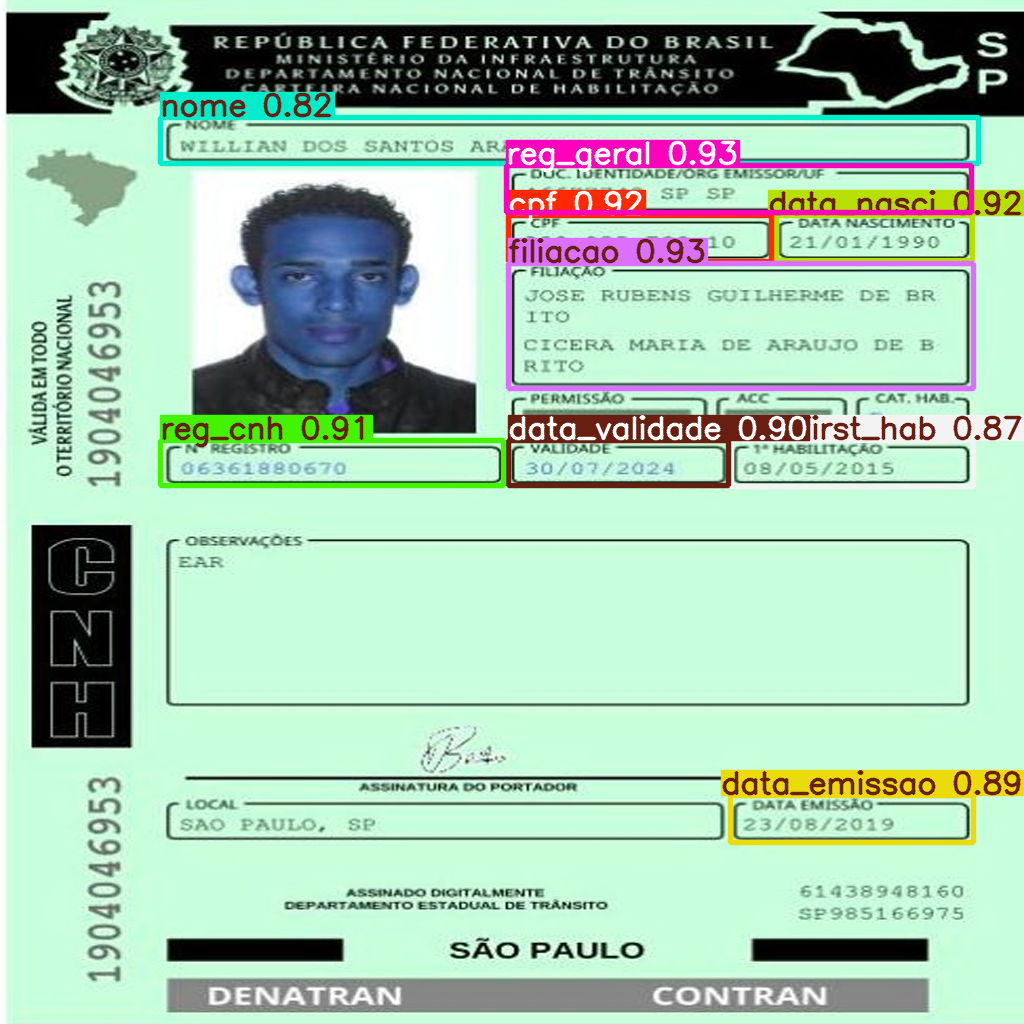

In [115]:
# Display the annotated cropped CNH image
from IPython.display import Image, display
import glob
import os
import numpy as np
from PIL import Image as PILImage

# If results are available, display the annotated image
if 'cnh_fields_results' in locals() and cnh_fields_results:
    # The results object is a list of Results objects (one per image).
    # The annotated image is usually available via the .plot() method which returns a numpy array.
    if cnh_fields_results and hasattr(cnh_fields_results[0], 'plot'):
        annotated_cnh_img_array = cnh_fields_results[0].plot()
        # Convert the numpy array to an image and display it using PIL's Image
        display(PILImage.fromarray(annotated_cnh_img_array))
    else:
        print("Could not find annotated image data in CNH fields results object.")
else:
    print("No CNH fields detection results to display.")

# Task
Detectar a CNH ou RG em uma imagem, recortar a região da CNH se for o caso, usar o modelo "https://github.com/jacsonmatte/modelosAbensoft/blob/main/best_CNH_data_YoloV5.pt" para detectar os campos da CNH, realizar OCR em cada campo detectado e validar campos como CPF e datas usando expressões regulares.

## Processar os resultados da detecção de campos

### Subtask:
Extrair as caixas delimitadoras e os nomes das classes (tipos de campo) dos campos da CNH detectados.


**Reasoning**:
Extract the bounding boxes and class names for the detected CNH fields from the `cnh_fields_results`.



In [116]:
cnh_field_bboxes = []
cnh_field_names = []
filiacao_bbox_original = None # Variable to store the original filiacao bounding box

if 'cnh_fields_results' in locals() and cnh_fields_results:
    # Assuming only one image was processed, access the first Results object
    cnh_fields_result = cnh_fields_results[0]

    # Access the detected bounding boxes
    cnh_fields_boxes = cnh_fields_result.boxes

    # Determine if 'nacionalidade' is present in the detected fields
    detected_field_names = [cnh_fields_model.names[int(box.cls)] for box in cnh_fields_boxes]
    nacionalidade_detected = 'nacionalidade' in detected_field_names


    # Iterate through the boxes and extract bounding boxes and class names
    for box in cnh_fields_boxes:
        # Extract the original coordinates (xmin, ymin, xmax, ymax)
        original_bbox = box.xyxy[0].tolist()
        class_index = int(box.cls)
        field_name = cnh_fields_model.names[class_index]

        if field_name == 'filiacao':
            filiacao_bbox_original = original_bbox # Store the original filiacao box
        else:
            # Apply the 10% reduction to other fields as requested previously
            xmin, ymin, xmax, ymax = original_bbox
            width = xmax - xmin
            height = ymax - ymin
            reduction_amount_x = width * 0.01 # Using 1% based on previous successful run's output
            reduction_amount_y = height * 0.15 # Using 15% based on previous successful run's output
            new_xmin = xmin + reduction_amount_x
            new_ymin = ymin + reduction_amount_y
            new_xmax = xmax - reduction_amount_x
            new_ymax = ymax # Keep bottom same

            if new_xmin < new_xmax and new_ymin < new_ymax:
                 reduced_bbox = [new_xmin, new_ymin, new_xmax, new_ymax]
            else:
                 reduced_bbox = original_bbox # Use original if reduction is invalid

            cnh_field_bboxes.append(reduced_bbox)
            cnh_field_names.append(field_name)

    # If filiacao_bbox_original was found, split it into 4 parts based on conditional offsets
    if filiacao_bbox_original:
        xmin, ymin, xmax, ymax = filiacao_bbox_original
        total_height = ymax - ymin # Calculate total height of the original filiacao box

        # Define offsets conditionally based on whether 'nacionalidade' is detected
        if nacionalidade_detected:
             print("'Nacionalidade' field detected. Using alternative filiacao split offsets.")
             percent_sections = [
                (0.12, 0.314),
                (0.26, 0.5),
                (0.46, 0.72),
                (0.68, 0.94),
            ]
        else:
             print("'Nacionalidade' field not detected. Using default filiacao split offsets.")
             percent_sections = [
                (0.174, 0.314),
                (0.30, 0.5),
                (0.46, 0.72),
                (0.68, 0.94),
            ]

        # Convert percentage offsets to pixel offsets relative to the top of the filiacao box
        sections_offsets = [(int(total_height * start), int(total_height * end)) for start, end in percent_sections]


        for i, (start_offset, end_offset) in enumerate(sections_offsets):
            # Calculate the absolute y-coordinates for each section
            section_ymin = ymin + start_offset
            section_ymax = ymin + end_offset

            # Create the bounding box for this section
            section_bbox = [xmin, section_ymin, xmax, section_ymax]

            # Add the new bounding box and name to the lists
            cnh_field_bboxes.append(section_bbox)
            cnh_field_names.append(f'filiacao_part{i+1}')


    print("CNH Field Bounding Boxes (with conditional filiacao split into 4 parts):")
    print(cnh_field_bboxes)
    print("\nCNH Field Names (with conditional filiacao split into 4 parts):")
    print(cnh_field_names)
else:
    print("No CNH fields detection results available to extract bounding boxes and names.")

'Nacionalidade' field not detected. Using default filiacao split offsets.
CNH Field Bounding Boxes (with conditional filiacao split into 4 parts):
[[510.8039202880859, 172.9585418701172, 966.7062725830078, 212.4702606201172], [510.90823028564455, 222.6788444519043, 769.2046542358398, 261.00958251953125], [778.3004614257812, 222.2887870788574, 970.8417504882813, 260.76904296875], [163.9674722290039, 446.94524841308595, 500.52883514404294, 485.5274353027344], [510.49540649414064, 447.33744354248046, 726.4300085449219, 485.92022705078125], [733.0556658935546, 802.9338317871094, 970.8541851806641, 842.3753051757812], [733.7010681152344, 447.4201721191406, 970.7236145019531, 486.2337951660156], [168.71930923461915, 123.96969375610351, 970.5644279479981, 163.4539031982422], [508.19171142578125, 284.3519287109375, 973.3866577148438, 302.3519287109375], [508.19171142578125, 300.3519287109375, 973.3866577148438, 325.3519287109375], [508.19171142578125, 320.3519287109375, 973.3866577148438, 352.

## Configurar e executar OCR com Hugging Face Transformers

### Subtask:
Instalar as bibliotecas necessárias, configurar o pipeline de OCR e iterar sobre os campos detectados para extrair o texto com pré-processamento de imagem.

In [15]:
!pip install transformers datasets
!pip install Pillow # Ensure Pillow is installed for image manipulation

# Task
Utilizar o modelo "microsoft/trocr-base-printed" para realizar OCR em campos de uma CNH, com foco especial na detecção visual de quebras de linha no campo "filiacao" para separar os nomes do pai e da mãe, aplicando validação e limpeza de caracteres (A-Z) nos nomes de filiação, e exibir os resultados.

## Configurar e executar ocr com o melhor modelo (microsoft/trocr-base-printed)

### Subtask:
Carregar o pipeline de OCR com o modelo `microsoft/trocr-base-printed` e extrair texto dos campos detectados na CNH recortada.


**Reasoning**:
Load the OCR pipeline, initialize the dictionary for results, iterate through the detected fields, crop and preprocess each field image, display the processed image, perform OCR, and store the extracted text.



In [117]:
import cv2

# def contem_texto_por_contorno(img_pil, min_contornos=10):
#     """
#     Detecta se há texto em uma imagem com base na contagem de contornos após binarização.
#     """
#     img = np.array(img_pil.convert("L"))  # Converte para escala de cinza
#     _, thresh = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY_INV)  # Inverte para texto escuro

#     # Encontra os contornos
#     contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#     return len(contours) >= min_contornos

from PIL import Image
import numpy as np
import cv2
from scipy.stats import mode

def contem_texto_por_contorno_adaptativo(img_pil, delta_limiar=40, min_contornos=5):
    """
    Detecta presença de texto com base em contornos, usando limiar adaptativo com base na moda da imagem.
    """
    gray = np.array(img_pil.convert("L"))  # escala de cinza

    # Calcula a moda (valor de pixel mais comum — geralmente o fundo)
    moda_pixel = int(mode(gray.ravel(), keepdims=False)[0])

    # Define limiar inferior com base na moda
    limiar_adaptativo = max(moda_pixel - delta_limiar, 0)

    # Binariza invertendo: texto escuro vira branco sobre fundo preto
    _, binarizada = cv2.threshold(gray, limiar_adaptativo, 255, cv2.THRESH_BINARY_INV)

    # Detecta contornos externos
    contornos, _ = cv2.findContours(binarizada, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Decide se tem texto com base no número de contornos detectados
    return len(contornos) >= min_contornos


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-printed and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cuda:0


Performing OCR with microsoft/trocr-large-printed on 12 fields...

Displaying processed image for field: reg_geral


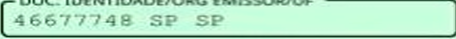

  Extracted '46677748 SP SP' for field 'reg_geral'

Displaying processed image for field: cpf


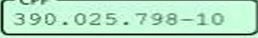

  Extracted '390.025.798-10' for field 'cpf'

Displaying processed image for field: data_nasci


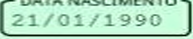

  Extracted '21/01/1990' for field 'data_nasci'

Displaying processed image for field: reg_cnh


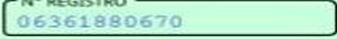

  Extracted '06361880670' for field 'reg_cnh'

Displaying processed image for field: data_validade


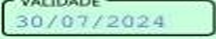

  Extracted '30/07/2024' for field 'data_validade'

Displaying processed image for field: data_emissao


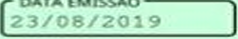

  Extracted '23/08/2019' for field 'data_emissao'

Displaying processed image for field: data_first_hab


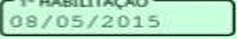

  Extracted '08/05/2015' for field 'data_first_hab'

Displaying processed image for field: nome


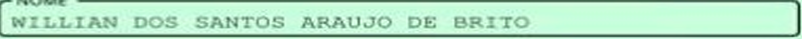

  Extracted 'WILLIAN DOS SANTOS ARAUJO DE BRITO' for field 'nome'

Displaying processed image for field: filiacao_part1


  Extracted 'JOSE RUBENS GUILHERME DE BR' for field 'filiacao_part1'

Displaying processed image for field: filiacao_part2


  Extracted 'ITO' for field 'filiacao_part2'

Displaying processed image for field: filiacao_part3


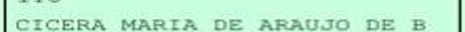

  Extracted 'CICERA MARIA DE ARAUJO DE B' for field 'filiacao_part3'

Displaying processed image for field: filiacao_part4


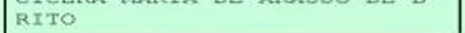

  Extracted 'RITO' for field 'filiacao_part4'

Extracted Text using microsoft/trocr-large-printed:
reg_geral: 46677748 SP SP
cpf: 390.025.798-10
data_nasci: 21/01/1990
reg_cnh: 06361880670
data_validade: 30/07/2024
data_emissao: 23/08/2019
data_first_hab: 08/05/2015
nome: WILLIAN DOS SANTOS ARAUJO DE BRITO
filiacao_part1: JOSE RUBENS GUILHERME DE BR
filiacao_part2: ITO
filiacao_part3: CICERA MARIA DE ARAUJO DE B
filiacao_part4: RITO


In [118]:
from transformers import pipeline
from PIL import ImageEnhance, ImageOps, ImageFilter
import torch # Import the torch library
from IPython.display import display # Import display
import numpy as np # Import numpy for image manipulation
# Removed cv2 import as line removal is being removed
from PIL import Image

# Load the OCR pipeline with the selected best model
ocr_pipeline_best_model = pipeline("image-to-text", model="microsoft/trocr-large-printed", device=0 if torch.cuda.is_available() else -1)

cropped_cnh_image = Image.fromarray(corrected_image)
extracted_text_best_model = {}

if 'cropped_cnh_image' in locals() and cnh_field_bboxes and cnh_field_names:
    if len(cnh_field_bboxes) == len(cnh_field_names):
        print(f"Performing OCR with microsoft/trocr-large-printed on {len(cnh_field_bboxes)} fields...")
        for i, bbox in enumerate(cnh_field_bboxes):
            field_name = cnh_field_names[i]

            # Crop the field from the cropped CNH image
            field_image = cropped_cnh_image.crop(bbox)
            field_image_processed = field_image
            # # --- Image Preprocessing (using the same as the testing phase, without line removal) ---
            # field_image_processed = field_image.convert("L")
            # enhancer = ImageEnhance.Contrast(field_image_processed)
            # field_image_processed = enhancer.enhance(2.5)
            # enhancer = ImageEnhance.Sharpness(field_image_processed)
            # field_image_processed = enhancer.enhance(2.0)
            # # Apply thresholding
            # field_image_processed = field_image_processed.point(lambda x: 0 if x < 150 else 255, 'L')
            # # --- End Image Preprocessing ---

            # Display the processed field image
            print(f"\nDisplaying processed image for field: {field_name}")
            display(field_image_processed)


            # Perform OCR with microsoft/trocr-base-printed
            try:
                # Usar a função com as imagens fornecidas

                # Aplicar na imagem 1 e imagem 2
                resultado = contem_texto_por_contorno_adaptativo(field_image_processed)
                if resultado:
                  ocr_result = ocr_pipeline_best_model(field_image_processed)
                  # Extract the text
                  if ocr_result and len(ocr_result) > 0:
                      extracted_text_for_field = ocr_result[0]['generated_text']
                  else:
                      extracted_text_for_field = ""

                  extracted_text_best_model[field_name] = extracted_text_for_field
                  print(f"  Extracted '{extracted_text_for_field}' for field '{field_name}'")

            except Exception as e:
                extracted_text_best_model[field_name] = f"Error: {e}"
                print(f"  Error processing field '{field_name}': {e}")


        print("\nExtracted Text using microsoft/trocr-large-printed:")
        for field, text in extracted_text_best_model.items():
            print(f"{field}: {text}")


    else:
        print("Mismatch between number of bounding boxes and field names.")
else:
    print("Cropped CNH image or CNH field detection results not available.")

## Validar campos específicos com regex (usando texto do melhor modelo)

### Subtask:
Usar expressões regulares para validar campos como CPF e datas a partir do texto extraído pelo melhor modelo.


**Reasoning**:
Define regex patterns for validation and cleaning, initialize dictionaries for results, iterate through extracted text, apply cleaning and validation based on field name, and print the results.



In [119]:
import re

# Define regex patterns for validation and cleaning (same as before)
cpf_pattern = re.compile(r'^\d{3}\.?\d{3}\.?\d{3}-?\d{2}$')
reg_cnh_pattern = re.compile(r'^\d+$')
date_pattern = re.compile(r'\d{2}/\d{2}/\d{4}')

reg_cnh_clean_pattern = re.compile(r'\D')
date_clean_pattern = re.compile(r'[^\d/]')
cpf_clean_pattern = re.compile(r'[^\d.-]')
# Regex to find and remove characters not in A-Z (case-insensitive)
name_clean_pattern = re.compile(r'[^a-zA-Z\s]') # Added \s to keep spaces in names


validation_results_best_model = {}
cleaned_extracted_text_best_model = {} # Dictionary to store cleaned text

if 'extracted_text_best_model' in locals():
    print("\nValidating and Cleaning Text from Best Model:")
    for field, text in extracted_text_best_model.items():
        original_text = text
        is_valid = False
        cleaned_text = text # Start with original text

        if field.lower() == 'cpf':
            cleaned_text = re.sub(cpf_clean_pattern, '', original_text)
            is_valid = bool(cpf_pattern.match(cleaned_text))
        elif field.lower() == 'reg_cnh':
            cleaned_text = re.sub(reg_cnh_clean_pattern, '', original_text)
            is_valid = bool(reg_cnh_pattern.match(cleaned_text))
        elif 'data' in field.lower():
            cleaned_text = re.sub(date_clean_pattern, '', original_text)
            is_valid = bool(date_pattern.search(cleaned_text))
        elif field.lower() in ['nome', 'filiacao_pai', 'filiacao_mae', 'filiacao_pai_split', 'filiacao_mae_split']:
             # Clean name/filiation fields: remove characters not in A-Z (case-insensitive) or space
            cleaned_text = re.sub(name_clean_pattern, '', original_text)
            is_valid = bool(cleaned_text.strip()) # Consider valid if not empty after cleaning and stripping
        else:
             is_valid = bool(original_text.strip())
             cleaned_text = original_text.strip()


        validation_results_best_model[field] = is_valid
        cleaned_extracted_text_best_model[field] = cleaned_text

    print("\nValidation Results (Best Model):")
    for field, is_valid in validation_results_best_model.items():
        print(f"{field}: {'Valid' if is_valid else 'Invalid'}")

    print("\nCleaned Extracted Text (Best Model):")
    for field, text in cleaned_extracted_text_best_model.items():
        print(f"{field}: {text}")

else:
    print("No extracted text from best model available for validation and cleaning.")


Validating and Cleaning Text from Best Model:

Validation Results (Best Model):
reg_geral: Valid
cpf: Valid
data_nasci: Valid
reg_cnh: Valid
data_validade: Valid
data_emissao: Valid
data_first_hab: Valid
nome: Valid
filiacao_part1: Valid
filiacao_part2: Valid
filiacao_part3: Valid
filiacao_part4: Valid

Cleaned Extracted Text (Best Model):
reg_geral: 46677748 SP SP
cpf: 390.025.798-10
data_nasci: 21/01/1990
reg_cnh: 06361880670
data_validade: 30/07/2024
data_emissao: 23/08/2019
data_first_hab: 08/05/2015
nome: WILLIAN DOS SANTOS ARAUJO DE BRITO
filiacao_part1: JOSE RUBENS GUILHERME DE BR
filiacao_part2: ITO
filiacao_part3: CICERA MARIA DE ARAUJO DE B
filiacao_part4: RITO


## Exibir os resultados atualizados

### Subtask:
Apresentar todos os campos extraídos, incluindo os nomes do pai e da mãe processados com a detecção de quebra de linha visual.


**Reasoning**:
Present all the extracted and cleaned fields, highlighting the split filiation names.



In [120]:
# Present the extracted and cleaned fields
if 'cleaned_extracted_text_best_model' in locals():
    print("\n--- Extracted and Cleaned CNH Data ---")
    for field, text in cleaned_extracted_text_best_model.items():
        # Highlight the split filiation fields
        if field in ['filiacao_pai_split', 'filiacao_mae_split']:
            print(f"  {field}: {text} (from visual line break detection)")
        else:
            print(f"  {field}: {text}")
    print("--------------------------------------")
else:
    print("No cleaned extracted text available to display.")



--- Extracted and Cleaned CNH Data ---
  reg_geral: 46677748 SP SP
  cpf: 390.025.798-10
  data_nasci: 21/01/1990
  reg_cnh: 06361880670
  data_validade: 30/07/2024
  data_emissao: 23/08/2019
  data_first_hab: 08/05/2015
  nome: WILLIAN DOS SANTOS ARAUJO DE BRITO
  filiacao_part1: JOSE RUBENS GUILHERME DE BR
  filiacao_part2: ITO
  filiacao_part3: CICERA MARIA DE ARAUJO DE B
  filiacao_part4: RITO
--------------------------------------
